<a href="https://colab.research.google.com/github/MusaibSyd/Deeplearning/blob/main/Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!nvidia-smi

Wed Oct 19 05:31:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('/content/cancer_classification.csv')

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df.shape

(569, 31)

In [13]:
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


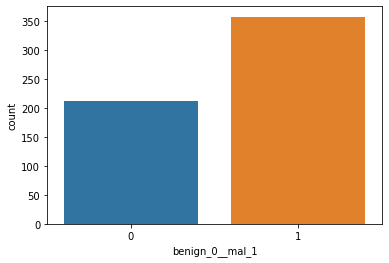

In [16]:
sns.countplot(x='benign_0__mal_1', data=df)

In [17]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

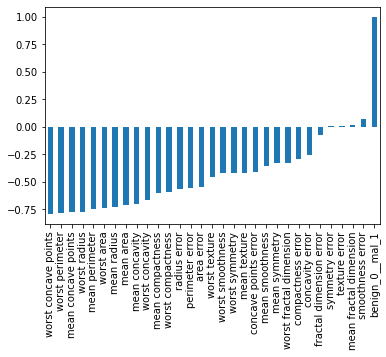

In [18]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [19]:
X=df.drop('benign_0__mal_1',axis=1)

In [20]:
y=df['benign_0__mal_1']

In [21]:
X.shape, y.shape

((569, 30), (569,))

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler=MinMaxScaler()

In [26]:
X_train=scaler.fit_transform(X_train)

In [27]:
X_test=scaler.transform(X_test)

In [28]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense, Dropout

In [31]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
               optimizer='adam')

In [32]:
model.fit(x=X_train, y=y_train, 
          epochs=500, 
          validation_data=(X_test,y_test))

Epoch 1/500
14/14 [==============================] - 3s 15ms/step - loss: 0.6745 - val_loss: 0.6627
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6452 - val_loss: 0.6307
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6111 - val_loss: 0.5991
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5650
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5416 - val_loss: 0.5262
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5014 - val_loss: 0.4853
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.4613 - val_loss: 0.4419
Epoch 8/500
14/14 [==============================] - 0s 4ms/step - loss: 0.4205 - val_loss: 0.3988
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 0.3812 - val_loss: 0.3603
Epoch 10/500
14/14 [==============================] - 0s 4ms/step - loss: 0.3456 - val_loss: 0.3252
Epoch 11

In [33]:
losses=pd.DataFrame(model.history.history)

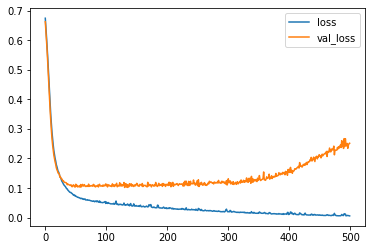

In [34]:
losses.plot()

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
               optimizer='adam')

In [37]:
early_stop=EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [38]:
model.fit(x=X_train, y=y_train, epochs=500,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 1s 13ms/step - loss: 0.7126 - val_loss: 0.6879
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6715 - val_loss: 0.6589
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6373 - val_loss: 0.6256
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5997 - val_loss: 0.5873
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5603 - val_loss: 0.5447
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5160 - val_loss: 0.4985
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4721 - val_loss: 0.4550
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4292 - val_loss: 0.4101
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 0.3902 - val_loss: 0.3703
Epoch 10/500
14/14 [==============================] - 0s 4ms/step - loss: 0.3525 - val_loss: 0.3317
Epoch 11

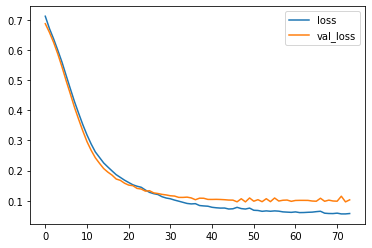

In [39]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [40]:
from tensorflow.keras.layers import Dropout

In [41]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam')

In [42]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [43]:
model.fit(x=X_train, y=y_train, epochs=500,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 1s 13ms/step - loss: 0.6999 - val_loss: 0.6763
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6714 - val_loss: 0.6621
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6582 - val_loss: 0.6483
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6594 - val_loss: 0.6317
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6371 - val_loss: 0.6115
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6137 - val_loss: 0.5846
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5906 - val_loss: 0.5506
Epoch 8/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5634 - val_loss: 0.5180
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5357 - val_loss: 0.4858
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5176 - val_loss: 0.4535
Epoch 11

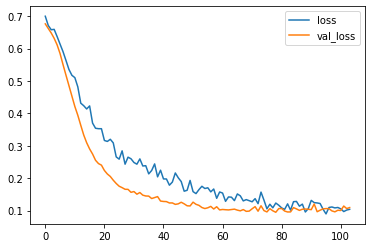

In [44]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [45]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [48]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 5 83]]


In [51]:
single_value=df.drop('benign_0__mal_1', axis=1).iloc[0] 

In [53]:
single_value.shape

(30,)

In [54]:
single_value=scaler.transform(single_value.values.reshape(-1,30))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [60]:
single_value

array([[0.53862713, 0.0226581 , 0.5520928 , 0.36373277, 0.59375282,
        0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
        0.40381852, 0.11996373, 0.43771307, 0.27323299, 0.21677384,
        0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
        0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
        0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396]])

In [61]:
predictions = (model.predict(single_value) > 0.5).astype("int32")

1/1 [==============================] - 0s 15ms/step


In [62]:
predictions

array([[0]], dtype=int32)